In [4]:
# pip install pydot
# sudo apt-get install graphviz

from IPython.display import Image, display
import pydot



In [13]:

import requests
from PIL import Image as Im

def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)
    
def download_image(url, id=0):
    # full_path = os.path.join(os.getcwd(), f'picture{id}.jpg')
    img_data = requests.get(url).content
    # print(requests.get(url).status_code)
    filename = f'img_data{id}.jpg'
    with open(filename, 'wb') as handler:
        handler.write(img_data)
    scale_img_by_width(filename)

def scale_img_by_width(filename):
    basewidth = 150
    img = Im.open(filename)
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((basewidth, hsize), Im.ANTIALIAS)
    img.save(filename)

In [14]:
from models_indexes.bm25_model import BM25Model

def get_taskgraph():
    model = BM25Model(domain="COOKING")
    taskgraph = model.search_best("pasta")
    return taskgraph
    

In [15]:
import os, glob

# url_img = "https://tastykitchen.com/recipes/wp-content/uploads/sites/2/2011/06/Dianes-pasta-410x271.jpg"
url_img = "./pasta_pic.jpg"

def get_visualization(parsed_taskgraph):
    
    # download images
    for idx, img_url in enumerate(parsed_taskgraph["steps_urls"]):
        if img_url != "":
            download_image(img_url, idx)
    
    graph = pydot.Dot(parsed_taskgraph["title"], graph_type='digraph', format="jpg")
    steps = parsed_taskgraph["steps"]
    
    # create title
    title = parsed_taskgraph["title"]
    dataset = parsed_taskgraph["dataset"]
    title_node = pydot.Node(-1, label=f"{title} by {dataset}")
    title_node.set_fontsize(16)
    title_node.set_shape("plaintext")
    graph.add_node(title_node)
    
    # imgNode = pydot.Node(-3 , label="",)
    # imgNode.set_image(os.path.join(os.getcwd(), url_img))
    # imgNode.set_shape("plaintext")
    # graph.add_node(imgNode)
    
    # graph.node(-3 , color='red', image=url_img)
    
    requirements_text = parsed_taskgraph["requirements"]
    requirement_node = pydot.Node(-2, label=f"{requirements_text}\l")
    requirement_node.set_fontsize(10)
    requirement_node.set_shape("note")
    graph.add_node(requirement_node)
    
    nodes = []
    steps = ["START"] + steps
    steps.append("FINISH")

    # Add Nodes for steps
    for idx, step in enumerate(steps):
        node = pydot.Node(idx, label=step)
        node.set_shape("box")
        node.set_fontsize(10)
        nodes.append(node)
        graph.add_node(node)
        print(idx)
        if  idx < len(steps) - 2 and parsed_taskgraph["steps_urls"][idx] != "":
            imgNode = pydot.Node(f"i{idx}", label="",)
            imgNode.set_image(os.path.join(os.getcwd(), f'img_data{idx}.jpg'))
            imgNode.set_shape("plaintext")
            graph.add_node(imgNode)
            edge = pydot.Edge(idx, f'i{idx}', color="white")
            edge.set_len(1)
            graph.add_edge(edge)
            

    nodes[0].set_shape("oval")
    nodes[-1].set_shape("oval")
    
    invisible_edge = pydot.Edge(-1, 0,  color="white")
    graph.add_edge(invisible_edge)

    # Add Edges for steps
    for idx in range(0, len(nodes) - 1):
        edge = pydot.Edge(idx, idx+1)
        edge.set_len(1)
        graph.add_edge(edge)
    
    edge = pydot.Edge(-1, -2, color="white")
    graph.add_edge(edge)
    
    edge = pydot.Edge(-2, 0, color="white")
    graph.add_edge(edge)
    
    graph.write_raw('output_raw.dot')
    graph.write_png('output.png')
    view_pydot(graph)

def delete_downloaded_images():
    # Getting All Files List
    fileList = glob.glob('img_data*.jpg', recursive=False)
        
    # Remove all files one by one
    for file in fileList:
        try:
            os.remove(file)
        except OSError:
            print("Error while deleting file")
    
    
def get_taksgraph_visualization(taskmap:TaskMap):
    parsed_taskgraph = parse_taskgraph(taskmap)
    get_visualization(parsed_taskgraph)
    delete_downloaded_images()
    
    


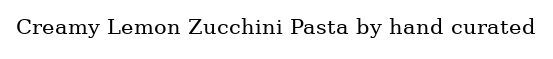

In [1]:
# task = get_taskgraph()
import sys
sys.path.insert(0, 'compiled_protobufs')
from taskmap_pb2 import TaskMap
import os

from draw_helper import parse_taskgraph, read_protobuf_list_from_file, get_task_visualization

import stream

task = read_protobuf_list_from_file("creamy_zucchini_pasta.proto", TaskMap)
parsed_takgraph = parse_taskgraph(task)
get_task_visualization(parsed_takgraph)



In [2]:
# help(pydot.Node(-1, label="hallo"))
task = read_protobuf_list_from_file("creamy_zucchini_pasta.proto", TaskMap)
print(task)

taskmap_id: "f4237f6e-b3d0-4e0a-8734-4bc0f35b1ff3"
title: "Creamy Lemon Zucchini Pasta"
date: "26/04/2022"
source_url: "https://www.bonappetit.com/recipe/creamy-lemon-zucchini-pasta"
description: "This Pasta with Creamy Zucchini Sauce may well become your new favourite zucchini recipe. Quick, easy, economical and a great way to use zucchinis to make a luscious pasta dinner!"
thumbnail_url: "https://assets.bonappetit.com/photos/5f48ef0f683772f4cb97e816/1:1/w_1920,c_limit/Basically-ZucchiniPasta05.jpg"
rating_out_100: 92
requirement_list {
  unique_id: "ca7967c5-3f80-4af2-8ff3-349b2ffa03f8"
  name: "4-6 Zucchini"
  amount: "1.4 pounds"
}
requirement_list {
  unique_id: "6fa36d7f-d2c4-4132-85c9-f12627875a75"
  name: "1 large shallot or half small onion"
  amount: "1 large"
}
requirement_list {
  unique_id: "24503180-6058-4381-bf77-f24b4315fd26"
  name: "4 large garlic cloves"
  amount: "4 large cloves"
}
requirement_list {
  unique_id: "5eb63af8-9ee4-4e27-b795-0206a2a1542e"
  name: "3 tbs

In [18]:
# (graph,) = pydot.graph_from_dot_file('output_raw.dot')
# graph.write_png('output.png')

